# ÏûÑÎ≤†Îî© ÎÇ¥ Ìé∏Ìñ•ÏÑ± ÏïåÏïÑÎ≥¥Í∏∞

## ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨

In [1]:
import konlpy
import gensim
import sklearn
import seaborn


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## WEAT Íµ¨ÌòÑ

In [2]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [3]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

In [4]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

## Ï†ÑÏ≤¥ ÏãúÎÜâÏãúÏä§Î°ú ÏûÑÎ≤†Îî© Î™®Îç∏ ÎßåÎì§Í∏∞

In [53]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

def read_token(file_name, mode='tfidf'):
    """
    mode:
        - 'tfidf' ‚Üí Ï†ÑÏ≤¥ Î¨∏ÏÑúÎ•º ÌïòÎÇòÏùò Ï§ÑÍ∏Ä(str)Î°ú Î∞òÌôò (TF-IDFÏö©)
        - 'w2v'   ‚Üí Î¨∏Ïû•Î≥ÑÎ°ú Î¶¨Ïä§Ìä∏(List[List[str]]) Î∞òÌôò (Word2VecÏö©)
    """
    okt = Okt()
    result = []
    file_path = os.path.join(os.getenv('HOME'), 'aiffel', 'weat', file_name)
    
    with open(file_path, 'r', encoding='utf-8') as fread:
        print(file_name, 'ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.')
        for line in fread:
            line = line.strip()
            if not line:
                continue
            tokenlist = okt.pos(line, stem=True, norm=True)
            tokens = [word for word, tag in tokenlist if tag == 'Noun']
            if mode == 'w2v':
                if tokens:
                    result.append(tokens)  # Î¨∏Ïû• Îã®ÏúÑ Î¶¨Ïä§Ìä∏
            else:  # mode == 'tfidf'
                result.extend(tokens)  # ÌïòÎÇòÏùò Í∏¥ Î¶¨Ïä§Ìä∏

    if mode == 'tfidf':
        return ' '.join(result)
    return result

In [54]:
total = 'synopsis.txt'
tokens = read_token(total, 'w2v')

synopsis.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.


In [55]:
print(len(tokens))

70683


In [56]:
from gensim.models import Word2Vec

# tokenizedÏóê Îã¥Í∏¥ Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏßÄÍ≥† ÎÇòÎßåÏùò Word2VecÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
model = Word2Vec(tokens, vector_size=100, window=5, min_count=3, sg=0)  

In [57]:
model.wv.most_similar(positive=['ÏÇ¨Îûë'])

[('Ï≤´ÏÇ¨Îûë', 0.7244093418121338),
 ('Ïï†Ï†ï', 0.7101054191589355),
 ('ÌñâÎ≥µ', 0.7090809941291809),
 ('Ïó∞Ïï†', 0.6942517161369324),
 ('ÏßÑÏã¨', 0.6923568248748779),
 ('Ïã†Ìö®', 0.6904844045639038),
 ('ÏÉÅÏ≤ò', 0.6776241064071655),
 ('ÎßåÎÇ®', 0.6707866191864014),
 ('Í≥†Î∞±', 0.6700478196144104),
 ('Ïö∞Ï†ï', 0.6689838767051697)]

## target Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú

In [36]:
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_gen.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.


In [37]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

In [38]:
m1 = X[0].tocoo()   # artÎ•º TF-IDFÎ°ú ÌëúÌòÑÌïú sparse matrixÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§. 
m2 = X[1].tocoo()   # genÏùÑ TF-IDFÎ°ú ÌëúÌòÑÌïú sparse matrixÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #artÎ•º Íµ¨ÏÑ±ÌïòÎäî Îã®Ïñ¥Îì§ÏùÑ TF-IDFÍ∞Ä ÎÜíÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨Ìï©ÎãàÎã§. 
w2.sort(key=lambda x: x[1], reverse=True)   #genÏùÑ Íµ¨ÏÑ±ÌïòÎäî Îã®Ïñ¥Îì§ÏùÑ TF-IDFÍ∞Ä ÎÜíÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨Ìï©ÎãàÎã§. 

### Îã®Ïñ¥ Ï∂îÏ∂ú 1. ÏÉÅÏúÑ 15Í∞ú ÎΩëÍ∏∞
Í≤πÏπòÎäî Îã®Ïñ¥Í∞Ä ÎÑàÎ¨¥ ÎßéÏïÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≤†Îã§.

In [39]:
print('ÏòàÏà†ÏòÅÌôîÎ•º ÎåÄÌëúÌïòÎäî Îã®Ïñ¥Îì§:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('ÏùºÎ∞òÏòÅÌôîÎ•º ÎåÄÌëúÌïòÎäî Îã®Ïñ¥Îì§:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

ÏòàÏà†ÏòÅÌôîÎ•º ÎåÄÌëúÌïòÎäî Îã®Ïñ¥Îì§:
Í∑∏ÎÖÄ, ÏûêÏã†, ÏãúÏûë, ÏúÑÌï¥, ÏÇ¨Îûë, ÏÇ¨Îûå, ÏòÅÌôî, ÏπúÍµ¨, ÎÇ®Ïûê, Í∞ÄÏ°±, Ïù¥ÏïºÍ∏∞, ÎßàÏùÑ, ÏÇ¨Í±¥, ÎßàÏùå, ÏÑ∏ÏÉÅ, ÏïÑÎ≤ÑÏßÄ, ÏïÑÏù¥, ÏóÑÎßà, Î™®Îì†, Ïó¨Ïûê, ÎåÄÌïú, ÏÑúÎ°ú, Í≥ºÏó∞, Îã§Ïãú, ÏãúÍ∞Ñ, ÏïÑÎì§, ÏÜåÎÖÄ, ÏïÑÎÇ¥, Îã§Î•∏, ÏÇ¨Ïù¥, ÏòÅÌôîÏ†ú, ÏÑ∏Í≥Ñ, ÏÇ¨Ïã§, ÌïòÎÇò, Ï†êÏ†ê, ÎÇ®Ìé∏, Í∞êÎèÖ, Ïó¨Ìñâ, Ïù∏ÏÉù, Î∞úÍ≤¨, Î™®Îëê, ÏàúÍ∞Ñ, Ïö∞Î¶¨, Í∞ÄÏû•, ÎßàÏßÄÎßâ, ÏÉùÌôú, ÏïÑÎπ†, Î™®Ïäµ, ÌÜµÌï¥, Ï£ΩÏùå, Í∏∞Ïñµ, ÎπÑÎ∞Ä, ÌïôÍµê, ÏùåÏïÖ, ÌïúÌé∏, ÏÜåÎÖÑ, ÏÉùÍ∞Å, ÎèÑÏãú, Î™ÖÏùò, ÏÇ¨Í≥†, Í≤∞Ìòº, Ï†ÑÏüÅ, ÎïåÎ¨∏, ÏúÑÍ∏∞, Ïù¥Ï†ú, ÏµúÍ≥†, Ïù¥Ïûê, Í≥ºÍ±∞, ÏùºÏÉÅ, Í≤ΩÏ∞∞, ÏÉÅÌô©, Í∞ÑÎã§, ÎØ∏Íµ≠, Í≤∞Ïã¨, Ïö¥Î™Ö, ÌòÑÏã§, Í¥ÄÍ≥Ñ, ÏßÄÍ∏à, Îã®Ìé∏, Ïó¨Ïù∏, ÌïòÎ£®, Ïù¥Î¶Ñ, Ïù¥ÌõÑ, Ï§ÄÎπÑ, Ïù∏Í∞Ñ, Í∞êÏ†ï, ÎßåÎÇú, Íµ≠Ï†ú, Ï≤òÏùå, Ï∂©Í≤©, ÏÇ¥Ïù∏, ÎàÑÍµ¨, ÎèôÏïà, Ï°¥Ïû¨, Í∑∏Î¶∞, Ïñ¥Î®∏Îãà, Ïó∞Ïù∏, Í≥ÑÏÜç, ÎèôÏÉù, ÏûëÌíà, 

ÏùºÎ∞òÏòÅÌôîÎ•º ÎåÄÌëúÌïòÎäî Îã®Ïñ¥Îì§:
ÏûêÏã†, Í∑∏ÎÖÄ, ÏòÅÌôîÏ†ú, ÏúÑÌï¥, ÏÇ¨Îûå, ÏãúÏûë, Íµ≠Ï†ú, ÏòÅÌôî, ÏπúÍµ¨, ÏÇ¨Îûë, ÎÇ®Ïûê, Ïù¥ÏïºÍ∏∞, Î

### Îã®Ïñ¥ Ï∂îÏ∂ú 2. Í≤πÏπòÏßÄ ÏïäÍ≤å ÏÉÅÏúÑ 15Í∞ú ÎΩëÍ∏∞

In [58]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1ÏóêÎßå ÏûàÍ≥† w2ÏóêÎäî ÏóÜÎäî, ÏòàÏà†ÏòÅÌôîÎ•º Ïûò ÎåÄÌëúÌïòÎäî Îã®Ïñ¥Î•º 15Í∞ú Ï∂îÏ∂úÌïúÎã§.
target_art_1, target_gen_1 = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art_1.append(w1_[i])
    if len(target_art_1) == n: break 

# w2ÏóêÎßå ÏûàÍ≥† w1ÏóêÎäî ÏóÜÎäî, ÏùºÎ∞òÏòÅÌôîÎ•º Ïûò ÎåÄÌëúÌïòÎäî Îã®Ïñ¥Î•º 15Í∞ú Ï∂îÏ∂úÌïúÎã§.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen_1.append(w2_[i])
    if len(target_gen_1) == n: break

In [59]:
print(target_art_1)
print(target_gen_1)

['ÏïÑÎπ†', 'ÏùåÏïÖ', 'Í≤∞Ïã¨', 'Ïö¥Î™Ö', 'ÏßÄÍ∏à', 'Ïó¨Ïù∏', 'Ïù¥Î¶Ñ', 'Ïù¥ÌõÑ', 'Ï§ÄÎπÑ', 'Í∞êÏ†ï', 'ÎßåÎÇú', 'Ï≤òÏùå', 'Ï∂©Í≤©', 'ÎàÑÍµ¨', 'Í∑∏Î¶∞']
['ÏÑúÏö∏', 'Ïï†ÎãàÎ©îÏù¥ÏÖò', 'Ïó¨ÏÑ±', 'Í∞ÄÏßÄ', 'Ï£ºÏù∏Í≥µ', 'ÎåÄÌï¥', 'Ïó∞Ï∂ú', 'ÏÇ¨Ìöå', 'Îã§ÌÅêÎ©òÌÑ∞Î¶¨', 'Î∂ÄÎ¨∏', 'ÏÑπÏä§', 'Î∞îÎ°ú', 'ÏùòÎèÑ', 'Í≥ÑÌöç', 'Ï†ïÏ≤¥']


## attribute Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú

In [6]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', 'Í∞ÄÏ°±', 'Í≥µÏó∞', 'Í≥µÌè¨(Ìò∏Îü¨)', 'Í∏∞ÌÉÄ', 'Îã§ÌÅêÎ©òÌÑ∞Î¶¨', 'ÎìúÎùºÎßà', 'Î©úÎ°úÎ°úÎß®Ïä§', 'ÎÆ§ÏßÄÏª¨', 'ÎØ∏Ïä§ÌÑ∞Î¶¨', 'Î≤îÏ£Ñ', 'ÏÇ¨Í∑π', 'ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥)',
         'ÏÑ±Ïù∏Î¨º(ÏóêÎ°ú)', 'Ïä§Î¶¥Îü¨', 'Ïï†ÎãàÎ©îÏù¥ÏÖò', 'Ïï°ÏÖò', 'Ïñ¥ÎìúÎ≤§Ï≤ò', 'Ï†ÑÏüÅ', 'ÏΩîÎØ∏Îîî', 'ÌåêÌÉÄÏßÄ']

In [7]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_family.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_show.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_horror.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_etc.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_documentary.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_drama.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_romance.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_musical.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_mystery.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_crime.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_historical.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_western.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_adult.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_thriller.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_animation.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_action.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_adventure.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_war.txt ÌååÏùºÏùÑ ÏùΩÍ≥† ÏûàÏäµÎãàÎã§.
synopsis_comedy.txt ÌååÏù

In [90]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

### Îã®Ïñ¥ Ï∂îÏ∂ú 1. ÏÉÅÏúÑ 15Í∞ú ÎΩëÍ∏∞

In [91]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

In [65]:
print(len(w))

21


In [110]:
for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes_1 = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes_1.append(attr)
    print()

SF: ÏúÑÌï¥, ÏûêÏã†, ÏßÄÍµ¨, ÏãúÏûë, ÏÇ¨Îûå, Ïù∏Î•ò, Ïù∏Í∞Ñ, ÎØ∏Îûò, Ïö∞Ï£º, Í∑∏ÎÖÄ, Î°úÎ¥á, ÏÑ∏Í≥Ñ, Î™®Îì†, Î∞ïÏÇ¨, Ïö∞Ï£ºÏÑ†, 
Í∞ÄÏ°±: ÏóÑÎßà, ÏïÑÎπ†, Í∞ÄÏ°±, ÏòÅÌôîÏ†ú, ÏûêÏã†, ÏúÑÌï¥, ÏπúÍµ¨, ÏïÑÏ£ºÎ•¥, ÏïÑÎ≤ÑÏßÄ, ÏãúÏûë, Í∑∏ÎÖÄ, ÏïÑÎì§, ÎßàÏùÑ, Íµ≠Ï†ú, ÎÇôÌÉÄ, 
Í≥µÏó∞: Ïò§ÌéòÎùº, ÏÇ¨Îûë, ÌÜ†Ïä§Ïπ¥, Ïã§Ìô©, Ïò¨Î†à, ÏûêÏã†, Ïπ¥Î∞î, Í∑∏ÎÖÄ, Í≥µÏó∞, Ïò§ÌÖîÎ°ú, Î¶¨Í≥®Î†àÌÜ†, Î∞±Ïûë, ÌîÑÎ†à, Î≤†Î•¥Îîî, ÏúÑÌï¥, 
Í≥µÌè¨(Ìò∏Îü¨): ÏãúÏûë, ÏúÑÌï¥, ÏÇ¨Îûå, ÏûêÏã†, ÏπúÍµ¨, Í∑∏ÎÖÄ, ÏÇ¨Í±¥, Í≥µÌè¨, Î∞úÍ≤¨, Ï£ΩÏùå, ÎßàÏùÑ, Í∞ÄÏ°±, ÏïÖÎ†π, ÎÇ®Ïûê, Ï¢ÄÎπÑ, 
Í∏∞ÌÉÄ: ÏòÅÌôîÏ†ú, Íµ≠Ï†ú, ÏÑúÏö∏, Îã®Ìé∏, ÏòÅÌôî, ÏûêÏã†, ÏÇ¨Îûå, Ïù¥ÏïºÍ∏∞, Í∑∏ÎÖÄ, ÎÇ®Ïûê, ÏúÑÌï¥, ÏãúÏûë, ÏÇ¨Îûë, Îâ¥ÎØ∏ÎîîÏñ¥, ÌéòÏä§Ìã∞Î≤å, 
Îã§ÌÅêÎ©òÌÑ∞Î¶¨: ÏòÅÌôîÏ†ú, ÏòÅÌôî, Îã§ÌÅê, Íµ≠Ï†ú, Îã§ÌÅêÎ©òÌÑ∞Î¶¨, ÏÇ¨Îûå, Ïù¥ÏïºÍ∏∞, ÎåÄÌïú, ÏûêÏã†, Í∞êÎèÖ, ÏúÑÌï¥, ÏÑúÏö∏, Ïö∞Î¶¨, ÏãúÏûë, ÏÑ∏Í≥Ñ, 
ÎìúÎùºÎßà: ÏûêÏã†, ÏòÅÌôîÏ†ú, Í∑∏ÎÖÄ, ÏÇ¨Îûå, ÏÇ¨Îûë, ÏòÅÌôî, ÏúÑÌï¥, ÏãúÏûë, Íµ≠Ï†ú, ÎÇ®Ïûê, ÏπúÍµ¨, Ïù¥ÏïºÍ∏∞, ÏóÑÎßà, Ïó¨Ïûê, ÏïÑÎ≤ÑÏßÄ, 
Î©úÎ°úÎ°ú

In [78]:
from collections import Counter

# 1. Ï†ÑÏ≤¥ Îã®Ïñ¥ ÌèâÌÉÑÌôî
all_words = [word for attr in attributes_1 for word in attr]

# 2. Ï§ëÎ≥µ Îã®Ïñ¥ Ïàò ÌôïÏù∏
counter = Counter(all_words)
duplicates = [word for word, cnt in counter.items() if cnt > 3]
num_duplicates = sum(counter[word] - 1 for word in duplicates)

# 3. Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò
total_words = len(all_words)

# 4. Í≤πÏπòÎäî ÎπÑÏú® Í≥ÑÏÇ∞
dup_ratio = num_duplicates / total_words
print(f'üîÅ Í≤πÏπòÎäî Îã®Ïñ¥ Ïàò: {num_duplicates} / Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò: {total_words}')
print(f'üìä Í≤πÏπòÎäî ÎπÑÏú®: {dup_ratio:.3f}')

üîÅ Í≤πÏπòÎäî Îã®Ïñ¥ Ïàò: 156 / Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò: 315
üìä Í≤πÏπòÎäî ÎπÑÏú®: 0.495


### Îã®Ïñ¥ Ï∂îÏ∂ú 2. Í≤πÏπòÏßÄ ÏïäÍ≤å ÏÉÅÏúÑ 15Í∞ú ÎΩëÍ∏∞
TF-IDF ÏÉÅÏúÑ ÌõÑÎ≥¥ Îã®Ïñ¥Î•º 200ÍπåÏßÄ ÎäòÎ†§ÎèÑ Îã®Ïñ¥ Í∞úÏàòÍ∞Ä ÎÑàÎ¨¥ Ï†ÅÏùÄ Î¨∏ÏÑú Ï°¥Ïû¨

In [89]:
from collections import Counter

n = 15  # Ïû•Î•¥Îãπ Ï∂îÏ∂úÌï† Îã®Ïñ¥ Ïàò
max_dup = 1  # ÏµúÎåÄ ÌóàÏö© Îì±Ïû• ÌöüÏàò

# 1. TF-IDF ÏÉÅÏúÑ ÌõÑÎ≥¥ Îã®Ïñ¥ ÏàòÏßë (ÏµúÎåÄ 200Í∞úÏî©)
print("candidate Í≥ÑÏÇ∞")
print(len(w))
candidate_lists = []
for i in range(len(w)):
    print(i)
    sorted_terms = sorted(w[i], key=lambda x: x[1], reverse=True)
    words = [
        vectorizer.get_feature_names()[idx]
        for idx, _ in sorted_terms[:200]
        if vectorizer.get_feature_names()[idx] in model.wv
    ]
    candidate_lists.append(words)

# 2. Ï†ÑÏ≤¥ Îã®Ïñ¥ Îì±Ïû• ÌöüÏàò Í≥ÑÏÇ∞
print("Îã®Ïñ¥ ÌöüÏàò Í≥ÑÏÇ∞")
flat_words = [word for lst in candidate_lists for word in lst]
word_counts = Counter(flat_words)

# 3. Ï§ëÎ≥µ Îã®Ïñ¥ Ï†úÏô∏ÌïòÍ≥† ÏµúÎåÄ 15Í∞úÏî© Ï∂îÏ∂ú
print("Ï§ëÎ≥µ Îã®Ïñ¥ Ï†úÏô∏")
attributes_2 = []
for i in range(len(candidate_lists)):
    print(genre_name[i], end=': ')
    attr = []
    for word in candidate_lists[i]:
        if word_counts[word] <= max_dup:
            attr.append(word)
        if len(attr) == n:
            break
    attributes_2.append(attr)
    print(', '.join(attr))


candidate Í≥ÑÏÇ∞
21
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Îã®Ïñ¥ ÌöüÏàò Í≥ÑÏÇ∞
Ï§ëÎ≥µ Îã®Ïñ¥ Ï†úÏô∏
SF: Ïô∏Í≥Ñ, ÏãúÏä§ÌÖú, Ïä§ÌÉÄÌÅ¨, Î¶¨ÌîåÎ¶¨, ÏºàÎπà, Ïª®Ìä∏, ÏàòÌçºÎß®, Ïô∏Í≥ÑÏù∏, Î∂ÑÌåå, ÏÉÅÏñ¥, Î¨ºÏ≤¥, ÏßÑÌôî, ÏàòÌä∏, ÌûàÎÖ∏ÌÇ§, ÏÑπÌÑ∞
Í∞ÄÏ°±: ÏïÑÏ£ºÎ•¥, ÎÇôÌÉÄ, Ïî®Ï†úÏù¥, ÎèôÍµ¨, ÏäàÏù¥Ìä∏, ÎßàÍ∞à, ÎØ∏ÏïÑ, Ìé†Î¶¨Ïπ∏, Î≤§Ìä∏, ÏºÄÏù¥Ïãú, ÏµúÌò∏, ÌòúÏßÄ, Ïú†ÎÇò, ÌÖåÎ¶¨, ÏÜêÎÖÄ
Í≥µÏó∞: Ïã§Ìô©, Ïò¨Î†à, Ïò§ÌÖîÎ°ú, Î¶¨Í≥®Î†àÌÜ†, Î∞±Ïûë, ÌîÑÎ†à, Î≤†Î•¥Îîî, ÎπÑÎ∞î, ÏΩòÏÑúÌä∏, Î∞±ÏûëÎ∂ÄÏù∏, Î∞òÎãà, ÏïÑÎ¶¨ÏïÑ, ÎØ∏ÎÖ∏, Ï∞®Ïù¥ÏΩîÌîÑÏä§ÌÇ§, ÎùºÎã§
Í≥µÌè¨(Ìò∏Îü¨): ÏïÖÎ†π, Í∑ÄÏã†, ÏÇ¨Îùº, Í∏∞Ïö¥, ÏπòÎ£å, Î∂ÑÌôçÏã†, Í±¥Î¨º, Ïã†Î∂Ä, ÏùòÏãù, ÎäëÎåÄÏù∏Í∞Ñ, Ï∫†Ìïë, Ï†ïÏã†Î≥ëÏõê, ÏßëÏïà, Î†àÎìú, ÏÉùÏ°¥Ïûê
Í∏∞ÌÉÄ: Îâ¥ÎØ∏ÎîîÏñ¥, ÏïÑÏãúÏïÑÎÇò, ÏÉÅÏòÅÏûë, ÏßÄÌïòÏ≤†, Ïú†ÎüΩ, Î©îÌä∏Î°ú, Ïã§ÌóòÏòÅÌôî, ÎåÄÌôî, Í¥ëÏ£º, ÌîÑÎùºÏù¥Îìú, ÎπÑÎîîÏò§, Î∞òÎ≥µ, ÎîîÏßÄÌÑ∏, Í≥µÏÇ¨, Ïû•Ïï†Ïù∏
Îã§ÌÅêÎ©òÌÑ∞Î¶¨: Ìà¨ÏüÅ, Ïù∏ÎîîÎã§ÌÅêÌéòÏä§Ìã∞Î∞ú, Î¨∏Ìôî, Í±¥Ï∂ï, Ïù∏ÌÑ∞Î∑∞, Ïö¥Îèô, ÏßÄÎÇú, ÎãπÏãú, Î™©ÏÜåÎ¶¨, Îì±Î

### Îã®Ïñ¥ Ï∂îÏ∂ú 3. 4Î≤à Ïù¥ÏÉÅ ÎÇòÏò§Îäî Îã®Ïñ¥Îäî Ï†úÏô∏ÌïòÍ∏∞

In [84]:
from collections import Counter

n = 15  # Ïû•Î•¥Îãπ Ï∂îÏ∂úÌï† Îã®Ïñ¥ Ïàò
max_dup = 3  # ÏµúÎåÄ ÌóàÏö© Îì±Ïû• ÌöüÏàò

# 1. TF-IDF ÏÉÅÏúÑ ÌõÑÎ≥¥ Îã®Ïñ¥ ÏàòÏßë (ÏµúÎåÄ 100Í∞úÏî©)
print("candidate Í≥ÑÏÇ∞")
print(len(w))
candidate_lists = []
for i in range(len(w)):
    print(i)
    sorted_terms = sorted(w[i], key=lambda x: x[1], reverse=True)
    words = [
        vectorizer.get_feature_names()[idx]
        for idx, _ in sorted_terms[:100]
        if vectorizer.get_feature_names()[idx] in model.wv
    ]
    candidate_lists.append(words)

# 2. Ï†ÑÏ≤¥ Îã®Ïñ¥ Îì±Ïû• ÌöüÏàò Í≥ÑÏÇ∞
print("Îã®Ïñ¥ ÌöüÏàò Í≥ÑÏÇ∞")
flat_words = [word for lst in candidate_lists for word in lst]
word_counts = Counter(flat_words)

# 3. Ï§ëÎ≥µ Îã®Ïñ¥ Ï†úÏô∏ÌïòÍ≥† ÏµúÎåÄ 15Í∞úÏî© Ï∂îÏ∂ú
print("Ï§ëÎ≥µ Îã®Ïñ¥ Ï†úÏô∏")
attributes_3 = []
for i in range(len(candidate_lists)):
    print(genre_name[i], end=': ')
    attr = []
    for word in candidate_lists[i]:
        if word_counts[word] <= max_dup:
            attr.append(word)
        if len(attr) == n:
            break
    attributes_3.append(attr)
    print(', '.join(attr))


candidate Í≥ÑÏÇ∞
21
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Îã®Ïñ¥ ÌöüÏàò Í≥ÑÏÇ∞
Ï§ëÎ≥µ Îã®Ïñ¥ Ï†úÏô∏
SF: Ïù∏Î•ò, ÎØ∏Îûò, Ïö∞Ï£º, Î°úÎ¥á, Î∞ïÏÇ¨, Ïö∞Ï£ºÏÑ†, Ïô∏Í≥Ñ, ÌñâÏÑ±, Ïã§Ìóò, Îä•Î†•, ÏãúÏä§ÌÖú, ÏÉùÎ™ÖÏ≤¥, Ï†ïÎ∂Ä, Ïä§ÌÉÄÌÅ¨, Î¶¨ÌîåÎ¶¨
Í∞ÄÏ°±: ÏïÑÏ£ºÎ•¥, ÎÇôÌÉÄ, Ïî®Ï†úÏù¥, ÎèôÍµ¨, ÏäàÏù¥Ìä∏, Ïñ¥Î®∏Îãà, ÎßàÍ∞à, ÎØ∏ÏïÑ, Ìé†Î¶¨Ïπ∏, Î≤§Ìä∏, ÏºÄÏù¥Ïãú, Ìï†ÏïÑÎ≤ÑÏßÄ, Ïó†Îßà, Í≥†ÏñëÏù¥, ÌÅ¨Î¶¨Ïä§ÎßàÏä§
Í≥µÏó∞: Ïò§ÌéòÎùº, ÌÜ†Ïä§Ïπ¥, Ïã§Ìô©, Ïò¨Î†à, Ïπ¥Î∞î, Í≥µÏó∞, Ïò§ÌÖîÎ°ú, Î¶¨Í≥®Î†àÌÜ†, Î∞±Ïûë, ÌîÑÎ†à, Î≤†Î•¥Îîî, Ïπ¥Î•¥Ìîº, ÎπÑÎ∞î, ÏôïÏûê, ÏΩòÏÑúÌä∏
Í≥µÌè¨(Ìò∏Îü¨): Í≥µÌè¨, ÏïÖÎ†π, Ï¢ÄÎπÑ, Ï†ÄÏ£º, Ïù¥ÌõÑ, ÏùºÌñâ, ÏïÖÎ™Ω, Î≥ëÏõê, ÌååÌã∞, Ïú†Î†π, Í∑ÄÏã†, ÏïÖÎßà, Ï†ÄÌÉù, Î∞îÏù¥Îü¨Ïä§, Ïù¥ÏÇ¨
Í∏∞ÌÉÄ: Îâ¥ÎØ∏ÎîîÏñ¥, ÌéòÏä§Ìã∞Î≤å, ÎèÖÎ¶Ω, ÏïÑÏãúÏïÑÎÇò, Ïó∞Ï∂ú, Ïù¥ÎØ∏ÏßÄ, Î∂ÄÏÇ∞, ÏÉÅÏòÅÏûë, ÏßÄÌïòÏ≤†, Ï≤≠ÏÜåÎÖÑ, Ïú†ÎüΩ, ÎÖ∏Ïù∏, ÏùòÎèÑ, ÌåêÌÉÄÏä§Ìã±, Í≥µÍ∞Ñ
Îã§ÌÅêÎ©òÌÑ∞Î¶¨: Îã§ÌÅê, Îã§ÌÅêÎ©òÌÑ∞Î¶¨, ÌïúÍµ≠, ÌôòÍ≤Ω, ÏÇ¨Ìöå, ÎÖ∏ÎèôÏûê, Í∏∞Î°ù, Ïó≠ÏÇ¨, Ïπ¥Î©îÎùº, Í≥ºÏ†ï, ÏßÄÏó≠, Ìà¨ÏüÅ, Ï

### Îã®Ïñ¥ Ï∂îÏ∂ú 4. LSA ÌôúÏö©

In [92]:
from sklearn.decomposition import TruncatedSVD

n_topics = 100  # Ï∂©Î∂ÑÌûà ÌÅ∞ Í∞í ÏÑ§Ï†ï
svd = TruncatedSVD(n_components=n_topics, random_state=42)
X_lsa = svd.fit_transform(X)  # shape: (21, 100)
topic_word_matrix = svd.components_  # shape: (100, vocab_size)

In [94]:
import numpy as np

# Í∞Å Î¨∏ÏÑúÏóêÏÑú Ï§ëÏöîÎèÑÍ∞Ä ÎÜíÏùÄ 5Í∞ú ÌÜ†ÌîΩ Ïù∏Îç±Ïä§ ÏÑ†ÌÉù
doc_top_topics = np.argsort(X_lsa, axis=1)[:, -5:]
print(doc_top_topics)

[[15 11 14 12  0]
 [ 4 12  1  9  0]
 [ 1  2  8  0  3]
 [19 15 10 16  0]
 [ 7  8 14  1  0]
 [12  8  7  1  0]
 [ 5 15 20  1  0]
 [15  5 19  2  0]
 [ 1  2  3  7  0]
 [ 7  9  8 10  0]
 [ 7 13  8 11  0]
 [ 9  7  3  0  5]
 [ 7  5  3  0  4]
 [11  5  6  2  0]
 [ 2  7  8 18  0]
 [ 5 10 11  1  0]
 [16 13 11 17  0]
 [ 6  4 14  3  0]
 [ 9  5  3  0  6]
 [13 17  2 15  0]
 [12  1 10 13  0]]


In [104]:
# Flatten ÌõÑ Îì±Ïû• ÌöüÏàò Í≥ÑÏÇ∞
topic_counts = Counter(doc_top_topics.flatten())

# 5Î≤à Ïù¥ÏÉÅ Îì±Ïû•Ìïú ÌÜ†ÌîΩ set
excluded_topics = {topic for topic, count in topic_counts.items() if count >= 5}

print(excluded_topics)

{0, 1, 2, 3, 5, 7, 8, 11, 15}


In [105]:
def select_valid_topics_for_doc(doc_topic_scores, excluded_set, top_k=5):
    # doc_topic_scores: shape (100,), ÌÜ†ÌîΩ Ï§ëÏöîÎèÑ
    sorted_indices = np.argsort(doc_topic_scores)[::-1]
    filtered = [i for i in sorted_indices if i not in excluded_set]
    return filtered[:top_k]

final_doc_topics = [
    select_valid_topics_for_doc(X_lsa[i], excluded_topics)
    for i in range(21)
]

print(final_doc_topics)

[[12, 14, 20, 19, 18], [9, 12, 4, 16, 13], [12, 9, 16, 14, 20], [16, 10, 19, 9, 4], [14, 16, 17, 13, 6], [12, 6, 18, 19, 16], [20, 14, 6, 13, 9], [19, 6, 18, 14, 4], [10, 14, 16, 9, 18], [10, 9, 17, 19, 14], [13, 9, 19, 20, 16], [9, 16, 14, 12, 10], [4, 6, 10, 12, 14], [6, 16, 4, 17, 20], [18, 9, 16, 10, 14], [10, 18, 19, 20, 4], [17, 13, 16, 18, 19], [14, 4, 6, 18, 19], [6, 9, 10, 14, 20], [17, 13, 9, 6, 4], [13, 10, 12, 18, 20]]


In [107]:
terms = vectorizer.get_feature_names_out()

def get_top_words_for_topic(topic_idx, top_k):
    word_scores = topic_word_matrix[topic_idx]
    top_word_indices = np.argsort(word_scores)[::-1][:top_k]
    return [terms[i] for i in top_word_indices]

# Í∞Å Î¨∏ÏÑúÏóê ÎåÄÌï¥ ÎåÄÌëú Îã®Ïñ¥ 15Í∞úÏî© Ï∂îÏ∂ú
doc_keywords = []
word_count_per_rank = [5, 4, 3, 2, 1]  # ÏàúÏúÑÎ≥Ñ Ï∂îÏ∂ú Îã®Ïñ¥ Ïàò

for doc_topics in final_doc_topics:
    words = []
    for rank, topic in enumerate(doc_topics[:5]):
        count = word_count_per_rank[rank]
        words.extend(get_top_words_for_topic(topic, top_k=count))
    doc_keywords.append(words)  # Ï¥ù 15Í∞ú Îã®Ïñ¥

In [109]:
for i, keywords in enumerate(doc_keywords):
    print(f"{genre_name[i]} ÎåÄÌëú Îã®Ïñ¥ 15Í∞ú:")
    print(", ".join(keywords))
    print("-" * 50)

SF ÎåÄÌëú Îã®Ïñ¥ 15Í∞ú:
ÏßÄÍµ¨, Ïù∏Î•ò, Î°úÎ¥á, ÎØ∏Îûò, Ïö∞Ï£º, Îã®Ìé∏, ÏÑúÏö∏, ÏòÅÌôîÏ†ú, Îâ¥ÎØ∏ÎîîÏñ¥, Î∂ÄÎ¨∏, ÏûêÏã†, Ïó∞Ï∂ú, ÏÇ¨Îûë, Ï°∞ÏßÅ, ÏÇ¥Ïù∏
--------------------------------------------------
Í∞ÄÏ°± ÎåÄÌëú Îã®Ïñ¥ 15Í∞ú:
ÏóÑÎßà, ÏïÑÎπ†, Í∞ÄÏ°±, ÏïÑÏ£ºÎ•¥, ÏÇ¨Í±¥, ÏßÄÍµ¨, Ïù∏Î•ò, Î°úÎ¥á, ÎØ∏Îûò, ÏÑúÎ∂Ä, Î≥¥ÏïàÍ¥Ä, Î≤åÎ¶∞, Í≥µÌè¨, ÏïÖÎ†π, ÏöîÍ¥¥
--------------------------------------------------
Í≥µÏó∞ ÎåÄÌëú Îã®Ïñ¥ 15Í∞ú:
ÏßÄÍµ¨, Ïù∏Î•ò, Î°úÎ¥á, ÎØ∏Îûò, Ïö∞Ï£º, ÏóÑÎßà, ÏïÑÎπ†, Í∞ÄÏ°±, ÏïÑÏ£ºÎ•¥, Í≥µÌè¨, ÏïÖÎ†π, Ï¢ÄÎπÑ, Îã®Ìé∏, ÏÑúÏö∏, Î∂ÄÎ¨∏
--------------------------------------------------
Í≥µÌè¨(Ìò∏Îü¨) ÎåÄÌëú Îã®Ïñ¥ 15Í∞ú:
Í≥µÌè¨, ÏïÖÎ†π, Ï¢ÄÎπÑ, ÏπúÍµ¨, ÎßàÏÇ¨ÏßÄ, Ïï†ÎãàÎ©îÏù¥ÏÖò, Ïù∏ÎîîÏï†ÎãàÌéòÏä§Ìä∏, ÏÜåÎÖÄ, ÏöîÍ¥¥, ÏÇ¨Îûë, Ï°∞ÏßÅ, Ï£ΩÏùå, ÏóÑÎßà, ÏïÑÎπ†, ÏÑúÎ∂Ä
--------------------------------------------------
Í∏∞ÌÉÄ ÎåÄÌëú Îã®Ïñ¥ 15Í∞ú:
Îã®Ìé∏, ÏÑúÏö∏, ÏòÅÌôîÏ†ú, Îâ¥ÎØ∏ÎîîÏñ¥, ÎÇ®Ïûê, Í≥µÌè¨, ÏïÖÎ†π, Ï¢ÄÎπÑ, ÏπúÍµ¨, Ï°∞ÏßÅ, ÏúÑÌï¥, Î¨¥Ïà†, ÏöîÍ¥¥, Ï°∞ÏßÅ, ÎèÖÏùºÍµ∞


## Ìé∏Ìñ•ÏÑ± Í≥ÑÏÇ∞

- targetÏùÄ art, gen
- attributeÎäî 21Í∞ÄÏßÄ Ïû•Î•¥
- targetÏùÄ Ï§ëÎ≥µ ÏóÜÏï§ TF-IDF Í∏∞Î∞ò ÎåÄÌëú Îã®Ïñ¥ 15Í∞ú
- attributeÎäî Ï¥ù 3Í∞ÄÏßÄ
    - Ï§ëÎ≥µ ÌóàÏö© TF-IDF ÎåÄÌëúÎã®Ïñ¥ 15Í∞ú
    - Ï§ëÎ≥µ 3Í∞úÍπåÏßÄ ÌóàÏö© TF-IDF ÎåÄÌëúÎã®Ïñ¥ 15Í∞ú
    - LSA Í∏∞Î∞ò Í∞Å Î¨∏ÏÑúÎ≥Ñ 5Í∞úÏùò Í¥ÄÎ†® ÌÜ†ÌîΩ Ïù¥Ïö©Ìïú ÎåÄÌëú Îã®Ïñ¥ 15Í∞ú

### WEAT matrix Í≥ÑÏÇ∞ Ìï®Ïàò

In [131]:
X = np.array([model.wv[word] for word in target_art_1])
Y = np.array([model.wv[word] for word in target_gen_1])

def weat_matrix(attributes):
    matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
    for i in range(len(genre_name)-1):
        for j in range(i+1, len(genre_name)):
            A = np.array([model.wv[word] for word in attributes[i]])
            B = np.array([model.wv[word] for word in attributes[j]])
            matrix[i][j] = weat_score(X, Y, A, B)
    for i in range(len(genre_name)-1):
        for j in range(i+1, len(genre_name)):
            print(genre_name[i], genre_name[j],matrix[i][j])
    return matrix

### 1. Ï§ëÎ≥µ ÌóàÏö© TF-IDF Í∏∞Î∞ò attribute

In [132]:
matrix_1 = weat_matrix(attributes_1)

SF Í∞ÄÏ°± -0.4765209
SF Í≥µÏó∞ -0.38478997
SF Í≥µÌè¨(Ìò∏Îü¨) -0.7006112
SF Í∏∞ÌÉÄ 0.36676002
SF Îã§ÌÅêÎ©òÌÑ∞Î¶¨ 0.59151906
SF ÎìúÎùºÎßà -0.3499357
SF Î©úÎ°úÎ°úÎß®Ïä§ -0.7659549
SF ÎÆ§ÏßÄÏª¨ 0.34348917
SF ÎØ∏Ïä§ÌÑ∞Î¶¨ -0.7025993
SF Î≤îÏ£Ñ -0.25677538
SF ÏÇ¨Í∑π -0.8175736
SF ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥) -0.4042424
SF ÏÑ±Ïù∏Î¨º(ÏóêÎ°ú) -0.5560337
SF Ïä§Î¶¥Îü¨ -0.5347039
SF Ïï†ÎãàÎ©îÏù¥ÏÖò 0.40146184
SF Ïï°ÏÖò -0.48022968
SF Ïñ¥ÎìúÎ≤§Ï≤ò -0.7689531
SF Ï†ÑÏüÅ 0.20941898
SF ÏΩîÎØ∏Îîî -0.44116795
SF ÌåêÌÉÄÏßÄ -0.19217087
Í∞ÄÏ°± Í≥µÏó∞ 0.12419852
Í∞ÄÏ°± Í≥µÌè¨(Ìò∏Îü¨) -0.23174237
Í∞ÄÏ°± Í∏∞ÌÉÄ 0.7362353
Í∞ÄÏ°± Îã§ÌÅêÎ©òÌÑ∞Î¶¨ 0.8100472
Í∞ÄÏ°± ÎìúÎùºÎßà 0.20012088
Í∞ÄÏ°± Î©úÎ°úÎ°úÎß®Ïä§ -0.627697
Í∞ÄÏ°± ÎÆ§ÏßÄÏª¨ 0.6810024
Í∞ÄÏ°± ÎØ∏Ïä§ÌÑ∞Î¶¨ -0.35441464
Í∞ÄÏ°± Î≤îÏ£Ñ 0.15923166
Í∞ÄÏ°± ÏÇ¨Í∑π -0.13430372
Í∞ÄÏ°± ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥) 0.3683209
Í∞ÄÏ°± ÏÑ±Ïù∏Î¨º(ÏóêÎ°ú) -0.33280793
Í∞ÄÏ°± Ïä§Î¶¥Îü¨ -0.18727513
Í∞ÄÏ°± Ïï†ÎãàÎ©îÏù¥ÏÖò 0.86237454
Í∞ÄÏ°± Ïï°ÏÖò 0.04730706
Í∞ÄÏ°± Ïñ¥ÎìúÎ≤§Ï≤ò -0.08247477
Í∞ÄÏ°±

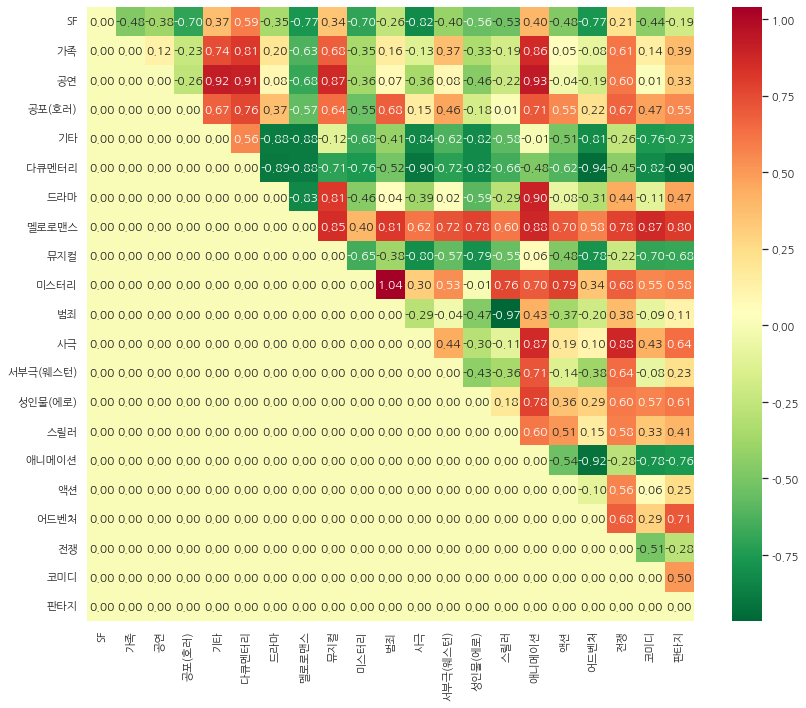

In [133]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
sns.set(font='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# ÌîåÎ°Ø ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.figure(figsize=(12, 10))  # ÏõêÌïòÎäî ÌÅ¨Í∏∞Î°ú Ï°∞Ï†à (Í∞ÄÎ°ú, ÏÑ∏Î°ú)

# heatmap Í∑∏Î¶¨Í∏∞ (ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ÍπåÏßÄ ÌëúÏãú)
ax = sns.heatmap(
    matrix_1,
    xticklabels=genre_name,
    yticklabels=genre_name,
    annot=True,
    fmt=".2f",  # ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ Î∞òÏò¨Î¶º
    cmap='RdYlGn_r'
)

plt.tight_layout()
plt.show()

- Îã§ÌÅêÎ©òÌÑ∞Î¶¨Í∞Ä ÏÉÅÏóÖ ÏòÅÌôîÎ°ú ÏπòÏö∞Ï≥ê ÏûàÍ≥†, Î©úÎ°úÎ°úÎ©òÏä§Í∞Ä ÏòàÏà† ÏòÅÌôîÎ°ú ÏπòÏö∞Ï≥ê ÏûàÎã§.
    - Í∞úÏù∏Ï†ÅÏúºÎ°ú ÏôÑÏ†ÑÌûà Î∞òÎåÄÎêòÏñ¥Ïïº ÎßûÎã§Í≥† ÏÉùÍ∞ÅÌïúÎã§.
- Í≥µÌè¨, ÎØ∏Ïä§ÌÑ∞Î¶¨, Ïä§Î¶¥Îü¨ Ïû•Î•¥Í∞Ä ÏòàÏà† ÏòÅÌôîÏùò Í≤ΩÌñ•ÏùÑ Î≥¥Ïù¥Í≥†, SF, ÎÆ§ÏßÄÏª¨, Ï†ÑÏüÅ Ïû•Î•¥Í∞Ä ÏÇ∞ÏóÖ ÏòÅÌôîÏùò Í≤ΩÌñ•ÏùÑ Î≥¥Ïù∏Îã§.
    - Í≥µÌè¨ Ïû•Î•¥ÏôÄ ÎÆ§ÏßÄÏª¨ Ïû•Î•¥Îäî Ï†ÅÏ†àÌïòÏßÄ ÏïäÎã§Í≥† ÏÉùÍ∞ÅÌïúÎã§.

In [134]:
print("=== WEAT Ï†êÏàò | Ï†àÎåìÍ∞í Í∏∞Ï§Ä 0.8 Ïù¥ÏÉÅÎßå Ï∂úÎ†• ===")
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        score = matrix_1[i][j]
        if abs(score) >= 0.8:
            print(f"{genre_name[i]} vs {genre_name[j]}: {score:.3f}")

=== WEAT Ï†êÏàò | Ï†àÎåìÍ∞í Í∏∞Ï§Ä 0.8 Ïù¥ÏÉÅÎßå Ï∂úÎ†• ===
SF vs ÏÇ¨Í∑π: -0.818
Í∞ÄÏ°± vs Îã§ÌÅêÎ©òÌÑ∞Î¶¨: 0.810
Í∞ÄÏ°± vs Ïï†ÎãàÎ©îÏù¥ÏÖò: 0.862
Í≥µÏó∞ vs Í∏∞ÌÉÄ: 0.918
Í≥µÏó∞ vs Îã§ÌÅêÎ©òÌÑ∞Î¶¨: 0.906
Í≥µÏó∞ vs ÎÆ§ÏßÄÏª¨: 0.873
Í≥µÏó∞ vs Ïï†ÎãàÎ©îÏù¥ÏÖò: 0.928
Í∏∞ÌÉÄ vs ÎìúÎùºÎßà: -0.883
Í∏∞ÌÉÄ vs Î©úÎ°úÎ°úÎß®Ïä§: -0.884
Í∏∞ÌÉÄ vs ÏÇ¨Í∑π: -0.839
Í∏∞ÌÉÄ vs ÏÑ±Ïù∏Î¨º(ÏóêÎ°ú): -0.822
Í∏∞ÌÉÄ vs Ïñ¥ÎìúÎ≤§Ï≤ò: -0.811
Îã§ÌÅêÎ©òÌÑ∞Î¶¨ vs ÎìúÎùºÎßà: -0.895
Îã§ÌÅêÎ©òÌÑ∞Î¶¨ vs Î©úÎ°úÎ°úÎß®Ïä§: -0.881
Îã§ÌÅêÎ©òÌÑ∞Î¶¨ vs ÏÇ¨Í∑π: -0.901
Îã§ÌÅêÎ©òÌÑ∞Î¶¨ vs ÏÑ±Ïù∏Î¨º(ÏóêÎ°ú): -0.824
Îã§ÌÅêÎ©òÌÑ∞Î¶¨ vs Ïñ¥ÎìúÎ≤§Ï≤ò: -0.938
Îã§ÌÅêÎ©òÌÑ∞Î¶¨ vs ÏΩîÎØ∏Îîî: -0.821
Îã§ÌÅêÎ©òÌÑ∞Î¶¨ vs ÌåêÌÉÄÏßÄ: -0.898
ÎìúÎùºÎßà vs Î©úÎ°úÎ°úÎß®Ïä§: -0.829
ÎìúÎùºÎßà vs ÎÆ§ÏßÄÏª¨: 0.810
ÎìúÎùºÎßà vs Ïï†ÎãàÎ©îÏù¥ÏÖò: 0.898
Î©úÎ°úÎ°úÎß®Ïä§ vs ÎÆ§ÏßÄÏª¨: 0.850
Î©úÎ°úÎ°úÎß®Ïä§ vs Î≤îÏ£Ñ: 0.807
Î©úÎ°úÎ°úÎß®Ïä§ vs Ïï†ÎãàÎ©îÏù¥ÏÖò: 0.876
Î©úÎ°úÎ°úÎß®Ïä§ vs ÏΩîÎØ∏Îîî: 0.870
ÎÆ§ÏßÄÏª¨ vs ÏÇ¨Í∑π: -0.805
ÎØ∏Ïä§ÌÑ∞Î¶¨ vs Î≤îÏ£Ñ: 1.040
Î

- ÏúÑÏóêÏÑú ÌôïÏù∏ÌñàÎçò Î∞îÏôÄ Í∞ôÏù¥ Îã§ÌÅêÎ©òÌÑ∞Î¶¨Í∞Ä ÏÉÅÏóÖ ÏòÅÌôîÏôÄ Í¥ÄÎ†®Ïù¥ ÎÜíÍ≥†, Î©úÎ°úÎ°úÎ©òÏä§Í∞Ä ÏòàÏà† ÏòÅÌôîÏôÄ Í¥ÄÎ†®Ïù¥ ÎÜíÎã§.
- Ïï†ÎãàÎ©îÏù¥ÏÖò Ïû•Î•¥Í∞Ä ÏÇ∞ÏóÖ ÏòÅÌôîÏôÄ Í¥ÄÎ†®Ïù¥ ÎÜíÎã§.
    - ÏïÑÏù¥Îì§ÏùÑ ÌÉÄÍπÉÏúºÎ°ú Ìïú Ïï†ÎãàÎ©îÏù¥ÏÖò ÏòÅÌôîÎäî ÏÇ∞ÏóÖ ÏòÅÌôîÏùò Í≤ΩÌñ•Ïù¥ ÎÜíÏúºÎØÄÎ°ú ÌÉÄÎãπÌïòÎã§.
- Í∏∞ÌÉÄÎ°ú Î∂ÑÎ•òÎêú ÏòÅÌôîÎì§Ïù¥ ÏÇ∞ÏóÖ ÏòÅÌôîÏôÄ Í¥ÄÎ†®Ïù¥ ÎÜíÎã§.
- ÏÇ¨Í∑π Ïû•Î•¥Í∞Ä ÏòàÏà† ÏòÅÌôîÏôÄ Í¥ÄÎ†®Ïù¥ ÎÜíÎã§.
    - ÏÇ¨Í∑πÏùÄ Î≥¥ÌÜµ ÏòàÏà† ÏòÅÌôîÏôÄ ÏÇ∞ÏóÖ ÏòÅÌôîÏùò Í≤ΩÍ≥ÑÏóê ÏûàÎã§Í≥† ÏÉùÍ∞ÅÌïòÏó¨ ÏòàÏà† ÏòÅÌôîÎ°ú ÏπòÏö∞ÏπòÎäî Í≤ÉÏùÄ ÌÉÄÎãπÌïòÏßÄ ÏïäÎã§Í≥† ÏÉùÍ∞ÅÌïúÎã§.

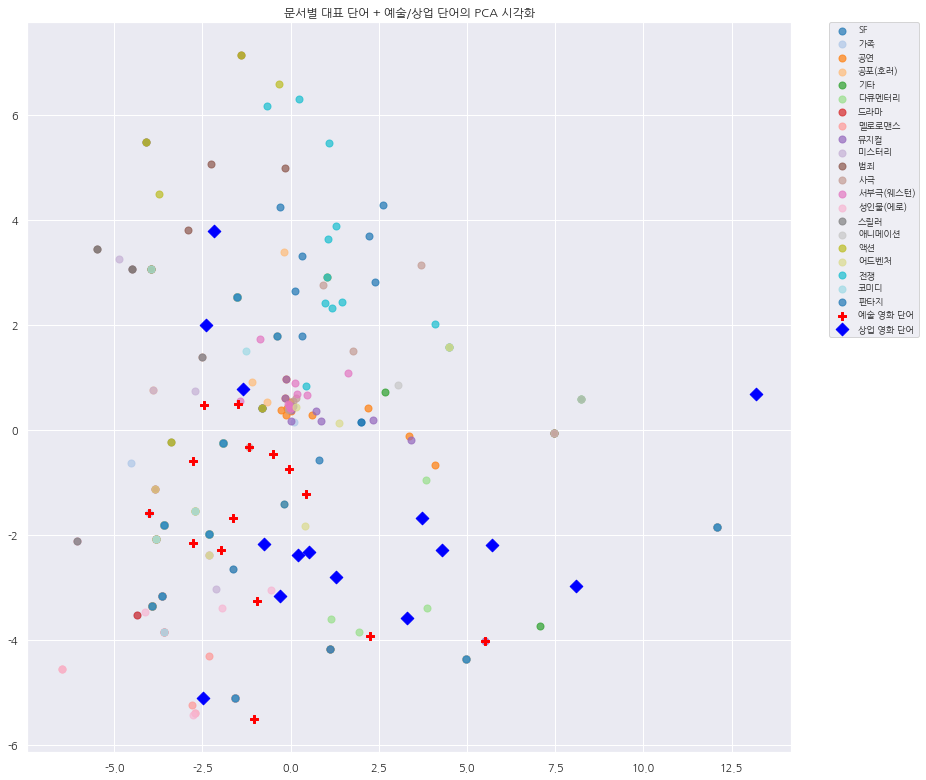

In [151]:
from sklearn.decomposition import PCA

def draw_pca(doc_keywords):
    # === 1. Ï†ÑÏ≤¥ Îã®Ïñ¥ ÏßëÌï© Íµ¨ÏÑ± ===
    unique_words = set(word for doc in doc_keywords for word in doc)
    unique_words |= set(target_art_1)
    unique_words |= set(target_gen_1)

    # === 2. Word2VecÏóê Ï°¥Ïû¨ÌïòÎäî Îã®Ïñ¥ ÌïÑÌÑ∞ÎßÅ ===
    filtered_words = [word for word in unique_words if word in model.wv]
    if len(filtered_words) < 2:
        print("‚ö†Ô∏è PCAÎ•º ÏàòÌñâÌï† Îã®Ïñ¥Í∞Ä Î∂ÄÏ°±Ìï©ÎãàÎã§.")
        return

    # === 3. Î≤°ÌÑ∞ ÏÉùÏÑ± Î∞è PCA ===
    filtered_vectors = np.array([model.wv[word] for word in filtered_words])
    pca = PCA(n_components=2)
    vecs_2d = pca.fit_transform(filtered_vectors)
    word2coord = {word: coord for word, coord in zip(filtered_words, vecs_2d)}

    # === 4. ÏÉâÏÉÅ ÏÑ§Ï†ï ===
    colors = sns.color_palette("tab20", len(doc_keywords))

    # === 5. ÏãúÍ∞ÅÌôî ===
    plt.figure(figsize=(13, 11))

    # (1) Î¨∏ÏÑúÎ≥Ñ ÎåÄÌëú Îã®Ïñ¥
    for i, (doc_words, genre) in enumerate(zip(doc_keywords, genre_name)):
        coords = np.array([word2coord[word] for word in doc_words if word in word2coord])
        if len(coords) == 0:
            continue
        plt.scatter(coords[:, 0], coords[:, 1], label=genre, color=colors[i], s=50, alpha=0.7)

    # (2) ÏòàÏà† ÏòÅÌôî target Îã®Ïñ¥ (Îπ®Í∞ÑÏÉâ, +)
    art_coords = np.array([word2coord[word] for word in target_art_1 if word in word2coord])
    if len(art_coords) > 0:
        plt.scatter(art_coords[:, 0], art_coords[:, 1], c='red', marker='P', s=80, label='ÏòàÏà† ÏòÅÌôî Îã®Ïñ¥')

    # (3) ÏÉÅÏóÖ ÏòÅÌôî target Îã®Ïñ¥ (ÌååÎûÄÏÉâ, ‚óÜ)
    gen_coords = np.array([word2coord[word] for word in target_gen_1 if word in word2coord])
    if len(gen_coords) > 0:
        plt.scatter(gen_coords[:, 0], gen_coords[:, 1], c='blue', marker='D', s=80, label='ÏÉÅÏóÖ ÏòÅÌôî Îã®Ïñ¥')

    # === 6. ÎßàÎ¨¥Î¶¨ ===
    plt.title("Î¨∏ÏÑúÎ≥Ñ ÎåÄÌëú Îã®Ïñ¥ + ÏòàÏà†/ÏÉÅÏóÖ Îã®Ïñ¥Ïùò PCA ÏãúÍ∞ÅÌôî")
    plt.legend(
        bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=9
    )
    plt.grid(True)
    plt.tight_layout()
    plt.show()


draw_pca(attributes_1)

PCA Í∑∏ÎûòÌîÑÏóêÏÑúÎäî Í∞Å Ïû•Î•¥ÏôÄ ÏòàÏà†/ÏÉÅÏóÖ Îã®Ïñ¥Ïùò Ïó∞Í¥ÄÏÑ±ÏùÑ ÌååÏïÖÌïòÍ∏∞ Ïñ¥Î†§Ïõ†Îã§.

### 2. 3Í∞úÍπåÏßÄ Ï§ëÎ≥µ ÌóàÏö© TF-IDF Í∏∞Î∞ò attribute

In [135]:
matrix_2 = weat_matrix(attributes_3)

SF Í∞ÄÏ°± -1.0074438
SF Í≥µÏó∞ -0.4307769
SF Í≥µÌè¨(Ìò∏Îü¨) -1.0106411
SF Í∏∞ÌÉÄ 0.3114644
SF Îã§ÌÅêÎ©òÌÑ∞Î¶¨ 0.32297832
SF ÎìúÎùºÎßà -0.2689912
SF Î©úÎ°úÎ°úÎß®Ïä§ -0.81169575
SF ÎÆ§ÏßÄÏª¨ -0.13911998
SF ÎØ∏Ïä§ÌÑ∞Î¶¨ -0.8140927
SF Î≤îÏ£Ñ -0.43994108
SF ÏÇ¨Í∑π -0.4014845
SF ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥) -0.8780245
SF ÏÑ±Ïù∏Î¨º(ÏóêÎ°ú) -0.6472716
SF Ïä§Î¶¥Îü¨ -0.75319135
SF Ïï†ÎãàÎ©îÏù¥ÏÖò -0.029878441
SF Ïï°ÏÖò -0.38963798
SF Ïñ¥ÎìúÎ≤§Ï≤ò -0.9290681
SF Ï†ÑÏüÅ -0.20975798
SF ÏΩîÎØ∏Îîî -0.77895474
SF ÌåêÌÉÄÏßÄ -0.9671702
Í∞ÄÏ°± Í≥µÏó∞ 0.7403542
Í∞ÄÏ°± Í≥µÌè¨(Ìò∏Îü¨) 0.15730599
Í∞ÄÏ°± Í∏∞ÌÉÄ 1.0059427
Í∞ÄÏ°± Îã§ÌÅêÎ©òÌÑ∞Î¶¨ 0.93486744
Í∞ÄÏ°± ÎìúÎùºÎßà 0.82947177
Í∞ÄÏ°± Î©úÎ°úÎ°úÎß®Ïä§ -0.24613507
Í∞ÄÏ°± ÎÆ§ÏßÄÏª¨ 0.92768
Í∞ÄÏ°± ÎØ∏Ïä§ÌÑ∞Î¶¨ 0.48070315
Í∞ÄÏ°± Î≤îÏ£Ñ 0.8144623
Í∞ÄÏ°± ÏÇ¨Í∑π 1.062417
Í∞ÄÏ°± ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥) 0.89312875
Í∞ÄÏ°± ÏÑ±Ïù∏Î¨º(ÏóêÎ°ú) 0.19171377
Í∞ÄÏ°± Ïä§Î¶¥Îü¨ 0.3586999
Í∞ÄÏ°± Ïï†ÎãàÎ©îÏù¥ÏÖò 0.94082963
Í∞ÄÏ°± Ïï°ÏÖò 0.8769309
Í∞ÄÏ°± Ïñ¥ÎìúÎ≤§Ï≤ò 0.78055173
Í∞ÄÏ°± Ï†ÑÏüÅ

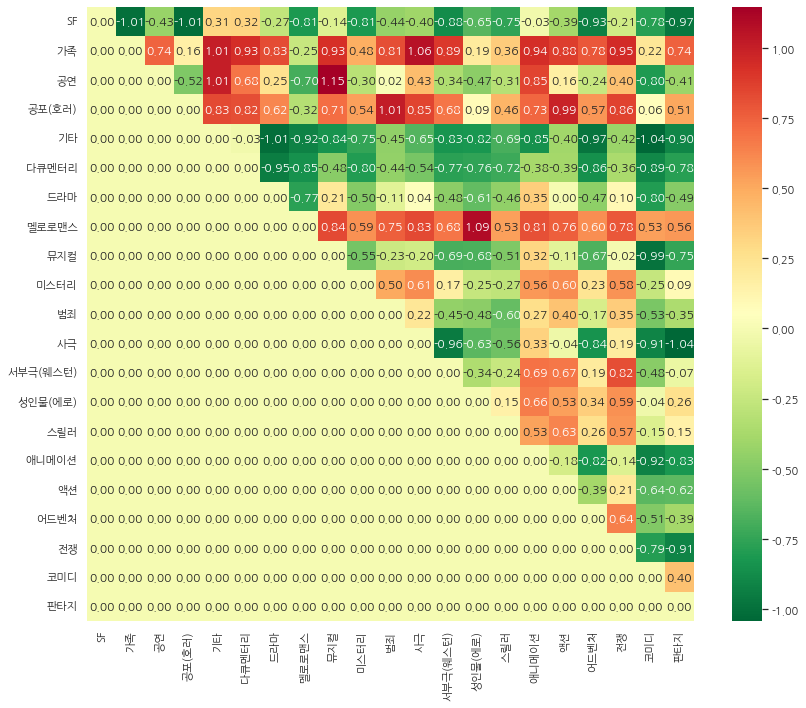

In [136]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
sns.set(font='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# ÌîåÎ°Ø ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.figure(figsize=(12, 10))  # ÏõêÌïòÎäî ÌÅ¨Í∏∞Î°ú Ï°∞Ï†à (Í∞ÄÎ°ú, ÏÑ∏Î°ú)

# heatmap Í∑∏Î¶¨Í∏∞ (ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ÍπåÏßÄ ÌëúÏãú)
ax = sns.heatmap(
    matrix_2,
    xticklabels=genre_name,
    yticklabels=genre_name,
    annot=True,
    fmt=".2f",  # ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ Î∞òÏò¨Î¶º
    cmap='RdYlGn_r'
)

plt.tight_layout()
plt.show()

- Ï§ëÎ≥µ Ï†úÍ±∞ Ï†Ñ Î∂ÑÏÑùÍ≥º ÎåÄÏ≤¥Î°ú ÎπÑÏä∑Ìïú Î∂ÑÌè¨Î•º Î≥¥ÏòÄÎã§.
- Í∞ÄÏ°± Ïû•Î•¥ÏôÄ ÌåêÌÉÄÏßÄ Ïû•Î•¥, ÏΩîÎØ∏Îîî Ïû•Î•¥Í∞Ä ÏòàÏà† ÏòÅÌôîÏôÄ Í¥ÄÎ†®Ïù¥ ÍπäÏñ¥Ï°åÎã§.
    - ÏÑ∏ Ïû•Î•¥ Î™®Îëê ÏòàÏà† ÏòÅÌôîÏôÄ ÌÅ∞ Ïó∞Í¥ÄÏù¥ ÏûàÏßÄ ÏïäÎã§Í≥† ÏÉùÍ∞ÅÌïúÎã§.
- ÎØ∏Ïä§ÌÑ∞Î¶¨ Ïû•Î•¥Ïùò Ìé∏Ìñ•ÏÑ±Ïù¥ Í∞êÏÜåÌñàÎã§.
    - ÎØ∏Ïä§ÌÑ∞Î¶¨ Ïû•Î•¥Îäî ÏÉÅÏóÖ ÏòÅÌôîÎèÑ ÎßéÎã§Í≥† ÏÉùÍ∞ÅÌïòÏó¨ Ìé∏Ìñ•ÏÑ±Ïù¥ Í∞êÏÜåÎêòÎäî Í≤ÉÏù¥ Ïò≥ÏùÄ Î∞©Ìñ•Ïù¥Îùº ÏÉùÍ∞ÅÌïúÎã§.

In [137]:
print("=== WEAT Ï†êÏàò | Ï†àÎåìÍ∞í Í∏∞Ï§Ä 0.8 Ïù¥ÏÉÅÎßå Ï∂úÎ†• ===")
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        score = matrix_2[i][j]
        if abs(score) >= 0.8:
            print(f"{genre_name[i]} vs {genre_name[j]}: {score:.3f}")

=== WEAT Ï†êÏàò | Ï†àÎåìÍ∞í Í∏∞Ï§Ä 0.8 Ïù¥ÏÉÅÎßå Ï∂úÎ†• ===
SF vs Í∞ÄÏ°±: -1.007
SF vs Í≥µÌè¨(Ìò∏Îü¨): -1.011
SF vs Î©úÎ°úÎ°úÎß®Ïä§: -0.812
SF vs ÎØ∏Ïä§ÌÑ∞Î¶¨: -0.814
SF vs ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥): -0.878
SF vs Ïñ¥ÎìúÎ≤§Ï≤ò: -0.929
SF vs ÌåêÌÉÄÏßÄ: -0.967
Í∞ÄÏ°± vs Í∏∞ÌÉÄ: 1.006
Í∞ÄÏ°± vs Îã§ÌÅêÎ©òÌÑ∞Î¶¨: 0.935
Í∞ÄÏ°± vs ÎìúÎùºÎßà: 0.829
Í∞ÄÏ°± vs ÎÆ§ÏßÄÏª¨: 0.928
Í∞ÄÏ°± vs Î≤îÏ£Ñ: 0.814
Í∞ÄÏ°± vs ÏÇ¨Í∑π: 1.062
Í∞ÄÏ°± vs ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥): 0.893
Í∞ÄÏ°± vs Ïï†ÎãàÎ©îÏù¥ÏÖò: 0.941
Í∞ÄÏ°± vs Ïï°ÏÖò: 0.877
Í∞ÄÏ°± vs Ï†ÑÏüÅ: 0.949
Í≥µÏó∞ vs Í∏∞ÌÉÄ: 1.008
Í≥µÏó∞ vs ÎÆ§ÏßÄÏª¨: 1.147
Í≥µÏó∞ vs Ïï†ÎãàÎ©îÏù¥ÏÖò: 0.848
Í≥µÏó∞ vs ÏΩîÎØ∏Îîî: -0.805
Í≥µÌè¨(Ìò∏Îü¨) vs Í∏∞ÌÉÄ: 0.831
Í≥µÌè¨(Ìò∏Îü¨) vs Îã§ÌÅêÎ©òÌÑ∞Î¶¨: 0.819
Í≥µÌè¨(Ìò∏Îü¨) vs Î≤îÏ£Ñ: 1.010
Í≥µÌè¨(Ìò∏Îü¨) vs ÏÇ¨Í∑π: 0.853
Í≥µÌè¨(Ìò∏Îü¨) vs Ïï°ÏÖò: 0.990
Í≥µÌè¨(Ìò∏Îü¨) vs Ï†ÑÏüÅ: 0.862
Í∏∞ÌÉÄ vs ÎìúÎùºÎßà: -1.014
Í∏∞ÌÉÄ vs Î©úÎ°úÎ°úÎß®Ïä§: -0.919
Í∏∞ÌÉÄ vs ÎÆ§ÏßÄÏª¨: -0.841
Í∏∞ÌÉÄ vs ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥): -0.835
Í∏∞ÌÉÄ vs ÏÑ±Ïù∏Î¨º(ÏóêÎ°ú)

- Ï§ëÎ≥µÎã®Ïñ¥ Ï†úÍ±∞ Ï†ÑÍ≥º ÎπÑÍµêÌñàÏùÑ Îïå Ìé∏Ìñ•ÏÑ±Ïù¥ ÎäòÏñ¥ÎÇú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
    - Í∞Å Ïû•Î•¥Î≥Ñ ÏÑúÎ°ú Îã§Î•∏ Îã®Ïñ¥Î•º Í∞ÄÏßÄÎã§ Î≥¥Îãà Í∞Å Ïû•Î•¥Î•º Îçî Ïûò ÎÇòÌÉÄÎÇ¥Îäî Îã®Ïñ¥Îì§Ïù¥ Ï∂îÏ∂úÎêú Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎê®.

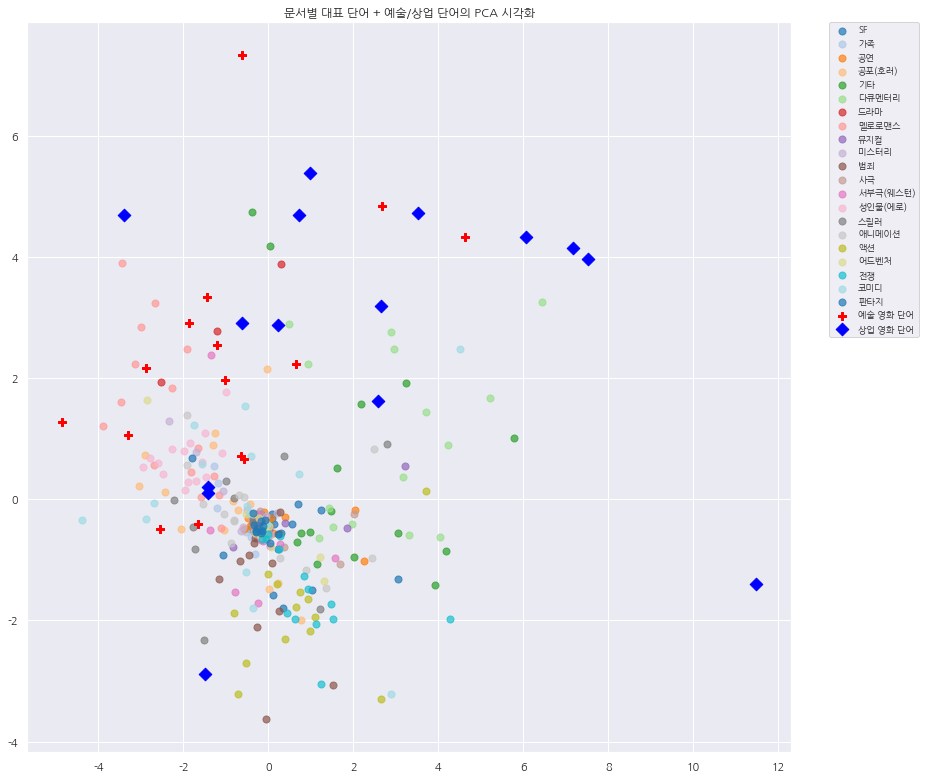

In [152]:
draw_pca(attributes_2)

Ï§ëÎ≥µ Îã®Ïñ¥ Ï†úÍ±∞ Ï†ÑÎ≥¥Îã§ Îçî Ï†êÎì§Ïù¥ Î™®Ïó¨ÏûàÎã§.

Í∏∞Ï°¥Ïùò Ï§ëÎ≥µ Îã®Ïñ¥Îì§Ïù¥ ÎπÑÏä∑Ìïú ÏúÑÏπòÏùò Îã§Î•∏ Îã®Ïñ¥Î°ú Î∞îÎÄåÏñ¥ Î∞ÄÏßëÎèÑÍ∞Ä Îçî ÎÜíÏïÑ Î≥¥Ïù¥Îäî Í≤ÉÏù¥Îùº ÏÉùÍ∞ÅÌïúÎã§.

### 3. LSA Í∏∞Î∞ò attribute

In [138]:
matrix_3 = weat_matrix(doc_keywords)

SF Í∞ÄÏ°± -0.7674697
SF Í≥µÏó∞ -0.8247801
SF Í≥µÌè¨(Ìò∏Îü¨) -0.98660463
SF Í∏∞ÌÉÄ -0.60269964
SF Îã§ÌÅêÎ©òÌÑ∞Î¶¨ -0.6725646
SF ÎìúÎùºÎßà -0.08939563
SF Î©úÎ°úÎ°úÎß®Ïä§ -0.89657545
SF ÎÆ§ÏßÄÏª¨ -0.8581327
SF ÎØ∏Ïä§ÌÑ∞Î¶¨ -1.0053028
SF Î≤îÏ£Ñ -0.8679935
SF ÏÇ¨Í∑π -0.8045964
SF ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥) -0.58301085
SF ÏÑ±Ïù∏Î¨º(ÏóêÎ°ú) -0.5424319
SF Ïä§Î¶¥Îü¨ -0.8267234
SF Ïï†ÎãàÎ©îÏù¥ÏÖò -0.90551084
SF Ïï°ÏÖò -0.7047911
SF Ïñ¥ÎìúÎ≤§Ï≤ò -0.8863187
SF Ï†ÑÏüÅ -0.75751376
SF ÏΩîÎØ∏Îîî -0.7474022
SF ÌåêÌÉÄÏßÄ -0.6961065
Í∞ÄÏ°± Í≥µÏó∞ 0.6457652
Í∞ÄÏ°± Í≥µÌè¨(Ìò∏Îü¨) -0.28713068
Í∞ÄÏ°± Í∏∞ÌÉÄ 0.62121826
Í∞ÄÏ°± Îã§ÌÅêÎ©òÌÑ∞Î¶¨ 0.32834545
Í∞ÄÏ°± ÎìúÎùºÎßà 0.680532
Í∞ÄÏ°± Î©úÎ°úÎ°úÎß®Ïä§ 0.28068492
Í∞ÄÏ°± ÎÆ§ÏßÄÏª¨ 0.52211404
Í∞ÄÏ°± ÎØ∏Ïä§ÌÑ∞Î¶¨ 0.07077701
Í∞ÄÏ°± Î≤îÏ£Ñ -0.27501664
Í∞ÄÏ°± ÏÇ¨Í∑π 0.6424192
Í∞ÄÏ°± ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥) 0.68131274
Í∞ÄÏ°± ÏÑ±Ïù∏Î¨º(ÏóêÎ°ú) 0.5984679
Í∞ÄÏ°± Ïä§Î¶¥Îü¨ 0.2997382
Í∞ÄÏ°± Ïï†ÎãàÎ©îÏù¥ÏÖò 0.1836862
Í∞ÄÏ°± Ïï°ÏÖò -0.09792292
Í∞ÄÏ°± Ïñ¥ÎìúÎ≤§Ï≤ò 0.5023612
Í∞ÄÏ°± Ï†Ñ

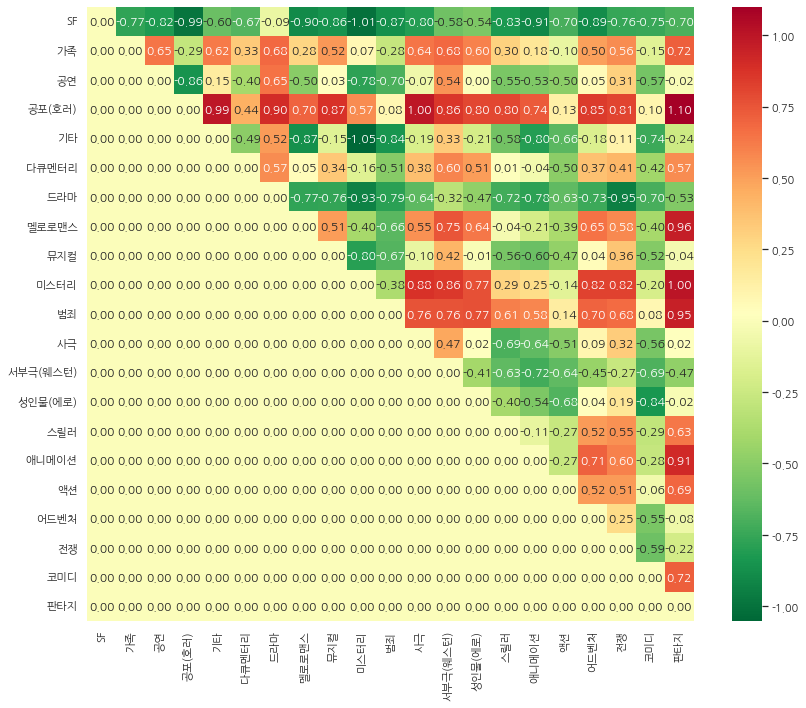

In [139]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
sns.set(font='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# ÌîåÎ°Ø ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.figure(figsize=(12, 10))  # ÏõêÌïòÎäî ÌÅ¨Í∏∞Î°ú Ï°∞Ï†à (Í∞ÄÎ°ú, ÏÑ∏Î°ú)

# heatmap Í∑∏Î¶¨Í∏∞ (ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ÍπåÏßÄ ÌëúÏãú)
ax = sns.heatmap(
    matrix_3,
    xticklabels=genre_name,
    yticklabels=genre_name,
    annot=True,
    fmt=".2f",  # ÏÜåÏàòÏ†ê ÎëòÏß∏ ÏûêÎ¶¨ Î∞òÏò¨Î¶º
    cmap='RdYlGn_r'
)

plt.tight_layout()
plt.show()

- SFÏôÄ ÎìúÎùºÎßà Ïû•Î•¥Ïùò Í≤ΩÏö∞ Îã§Î•∏ Ïû•Î•¥Ïóê ÎπÑÌï¥ ÏÉÅÏóÖÏòÅÌôî Ï™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
- Í≥µÌè¨/Ìò∏Îü¨ÏôÄ ÎØ∏Ïä§ÌÑ∞Î¶¨, Î≤îÏ£Ñ Ïû•Î•¥Í∞Ä Îã§Î•∏ Ïû•Î•¥Ïóê ÎπÑÌï¥ ÏòàÏà†ÏòÅÌôî Ï™ΩÏúºÎ°ú ÏπòÏö∞Ï≥§Îã§.
- Îçî ÏûêÏÑ∏Ìïú ÎπÑÍµêÎäî ÏïÑÎûò Í≤∞Í≥ºÏóêÏÑú ÌôïÏù∏Ìï¥Î≥¥Ïûê.

In [140]:
print("=== WEAT Ï†êÏàò | Ï†àÎåìÍ∞í Í∏∞Ï§Ä 0.8 Ïù¥ÏÉÅÎßå Ï∂úÎ†• ===")
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        score = matrix_3[i][j]
        if abs(score) >= 0.8:
            print(f"{genre_name[i]} vs {genre_name[j]}: {score:.3f}")

=== WEAT Ï†êÏàò | Ï†àÎåìÍ∞í Í∏∞Ï§Ä 0.8 Ïù¥ÏÉÅÎßå Ï∂úÎ†• ===
SF vs Í≥µÏó∞: -0.825
SF vs Í≥µÌè¨(Ìò∏Îü¨): -0.987
SF vs Î©úÎ°úÎ°úÎß®Ïä§: -0.897
SF vs ÎÆ§ÏßÄÏª¨: -0.858
SF vs ÎØ∏Ïä§ÌÑ∞Î¶¨: -1.005
SF vs Î≤îÏ£Ñ: -0.868
SF vs ÏÇ¨Í∑π: -0.805
SF vs Ïä§Î¶¥Îü¨: -0.827
SF vs Ïï†ÎãàÎ©îÏù¥ÏÖò: -0.906
SF vs Ïñ¥ÎìúÎ≤§Ï≤ò: -0.886
Í≥µÏó∞ vs Í≥µÌè¨(Ìò∏Îü¨): -0.858
Í≥µÌè¨(Ìò∏Îü¨) vs Í∏∞ÌÉÄ: 0.992
Í≥µÌè¨(Ìò∏Îü¨) vs ÎìúÎùºÎßà: 0.901
Í≥µÌè¨(Ìò∏Îü¨) vs ÎÆ§ÏßÄÏª¨: 0.875
Í≥µÌè¨(Ìò∏Îü¨) vs ÏÇ¨Í∑π: 0.997
Í≥µÌè¨(Ìò∏Îü¨) vs ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥): 0.863
Í≥µÌè¨(Ìò∏Îü¨) vs ÏÑ±Ïù∏Î¨º(ÏóêÎ°ú): 0.805
Í≥µÌè¨(Ìò∏Îü¨) vs Ïñ¥ÎìúÎ≤§Ï≤ò: 0.847
Í≥µÌè¨(Ìò∏Îü¨) vs Ï†ÑÏüÅ: 0.809
Í≥µÌè¨(Ìò∏Îü¨) vs ÌåêÌÉÄÏßÄ: 1.100
Í∏∞ÌÉÄ vs Î©úÎ°úÎ°úÎß®Ïä§: -0.868
Í∏∞ÌÉÄ vs ÎØ∏Ïä§ÌÑ∞Î¶¨: -1.052
Í∏∞ÌÉÄ vs Î≤îÏ£Ñ: -0.843
Í∏∞ÌÉÄ vs Ïï†ÎãàÎ©îÏù¥ÏÖò: -0.802
ÎìúÎùºÎßà vs ÎØ∏Ïä§ÌÑ∞Î¶¨: -0.932
ÎìúÎùºÎßà vs Ï†ÑÏüÅ: -0.947
Î©úÎ°úÎ°úÎß®Ïä§ vs ÌåêÌÉÄÏßÄ: 0.961
ÎØ∏Ïä§ÌÑ∞Î¶¨ vs ÏÇ¨Í∑π: 0.881
ÎØ∏Ïä§ÌÑ∞Î¶¨ vs ÏÑúÎ∂ÄÍ∑π(Ïõ®Ïä§ÌÑ¥): 0.855
ÎØ∏Ïä§ÌÑ∞Î¶¨ vs Ïñ¥ÎìúÎ≤§Ï≤ò:

- ÏúÑÏóêÏÑú ÌôïÏù∏ÌñàÎçò Î∞îÏôÄ Í∞ôÏù¥ SFÏôÄ ÎìúÎùºÎßàÍ∞Ä ÏÉÅÏóÖÏÑ±ÏùÑ ÎùÑÍ≥†, Í≥µÌè¨ÏôÄ ÎØ∏Ïä§ÌÑ∞Î¶¨Í∞Ä ÏòàÏà†ÏÑ±ÏùÑ ÎùÑÍ≥† ÏûàÎã§.
    - SFÍ∞Ä ÎåÄÎ∂ÄÎ∂Ñ ÏÉÅÏóÖÏÑ±ÏùÑ ÎùÑÎäî Í≤ÉÍ≥º ÎØ∏Ïä§ÌÑ∞Î¶¨Í∞Ä ÎåÄÎ∂ÄÎ∂Ñ ÏòàÏà† ÏòÅÌôîÏûÑÏùÄ ÎÇ¥ ÏÉùÍ∞ÅÍ≥º ÎèôÏùºÌïòÎã§.
    - ÎìúÎùºÎßàÏùò Í≤ΩÏö∞ Ïù∏Í∞Ñ ÎÇ¥Î©¥Í≥º Í¥ÄÍ≥ÑÎ•º Îã§Î£®Îäî ÏûëÌíàÏùÑ Í≥†Î†§ÌïòÎ©¥ ÏÉÅÏóÖÏÑ±ÏùÑ ÌÅ¨Í≤å ÎùàÎã§Í≥† Î≥¥Í∏∞ Ïñ¥Î†§Ïö∏ Í≤É Í∞ôÎã§.
    - Í≥µÌè¨ ÏòÅÌôîÏùò Í≤ΩÏö∞ÏóêÎèÑ Ï†ÄÏòàÏÇ∞ BÍ∏â ÎòêÎäî Ìù•Ìñâ Î™©ÌëúÎ°ú Ï†úÏûëÎêú Í≤ΩÏö∞Í∞Ä ÎßéÏïÑ ÏòàÏà†ÏÑ±ÏúºÎ°ú ÏπòÏúÑÎäî Í≤ÉÏùÄ Ïù¥Ìï¥ÌïòÍ∏∞ Ïñ¥Î†µÎã§.
- Í∏∞ÌÉÄÏùò Í≤ΩÏö∞ Ïû•Î•¥Í∞Ä ÌäπÏ†ïÎêòÏßÄ ÏïäÏïòÍ∏∞ ÎïåÎ¨∏Ïóê ÏÉÅÏóÖÏÑ±Ïù¥ÎÇò ÏòàÏà†ÏÑ±ÏùÑ ÎùÑÏßÄ ÏïäÏùÑ Í≤ÉÏù¥Îùº ÌåêÎã®ÎêòÎäîÎç∞, Í∏∞ÌÉÄÏôÄÏùò ÎπÑÍµêÏóêÏÑú ÏòàÏà† ÏòÅÌôî Í≤ΩÌñ•ÏÑ±Ïù¥ ÎÜíÏùÄ Í≥µÌè¨, Î©úÎ°úÎ°úÎ©òÏä§, ÎØ∏Ïä§ÌÑ∞Î¶¨, Î≤îÏ£Ñ, Ïï†ÎãàÎ©îÏù¥ÏÖò Ïû•Î•¥Í∞Ä ÏòàÏà† ÏòÅÌôîÏùò Í≤ΩÌñ•ÏùÑ ÎùàÎã§Í≥† Î≥¥Ïó¨ÏßÑÎã§.
    - Ïï†ÎãàÎ©îÏù¥ÏÖò Ïû•Î•¥Ïùò Í≤ΩÏö∞ Ïñ¥Î¶∞Ïù¥ ÌÉÄÍπÉ Ï§ëÏã¨Ïù∏ Í≤ΩÏö∞ ÏÉÅÏóÖÏòÅÌôîÎ°ú Í∞ÑÏ£ºÌïòÍ≥†, ÏòàÏà†ÏòÅÌôîÍ∞Ä ÍΩ§ ÏûàÏúºÎÇò Í∏∞ÌÉÄ Ïû•Î•¥ÏôÄÏùò ÎπÑÍµêÏóêÏÑú ÏòàÏà† ÏòÅÌôîÎ°ú ÏπòÏö∞ÏπòÎäî Í≤ÉÏùÄ Ïù¥Ìï¥ÌïòÍ∏∞ ÌûòÎì§Îã§.
- ÌåêÌÉÄÏßÄ ÏòÅÌôîÍ∞Ä ÏÉÅÏóÖ ÏòÅÌôîÎ°ú Ïù∏ÏãùÎêòÎäî Í≤ΩÌñ•Ïù¥ ÎÜíÎã§. ÌåêÌÉÄÏßÄÏôÄ Í∞ôÏù¥ ÎèàÏù¥ ÎßéÏù¥ ÌïÑÏöîÌïú ÏòÅÌôîÍ∞Ä ÏòàÏà†ÏòÅÌôîÎ°ú ÎÇòÏò§Îäî Í≤ΩÏö∞Îäî Ïûò ÏóÜÎã§Í≥† ÏÉùÍ∞ÅÌïòÏó¨ ÏùºÎ¶¨Í∞Ä ÏûàÎã§Í≥† ÌåêÎã®ÎêúÎã§.
- Îã§ÌÅêÎ©òÌÑ∞Î¶¨ Ïû•Î•¥Í∞Ä ÏòàÏà†ÏòÅÌôîÏôÄ Îß§Ïö∞ Î∞ÄÏ†ëÌïú Í¥ÄÎ†®Ïù¥ ÏûàÏùÑ Í≤ÉÏúºÎ°ú ÏÉùÍ∞ÅÎêòÏóàÎäîÎç∞, TF-IDF Í≤∞Í≥ºÎ≥¥Îã® Ï§ëÎ¶ΩÏóê Í∞ÄÍπåÏõåÏ°åÏúºÎÇò Ïôú ÏòàÏà†ÏòÅÌôîÎ°ú ÏπòÏö∞ÏπòÏßÄ ÏïäÎäîÏßÄ ÏùòÎ¨∏Ïù¥Îã§.

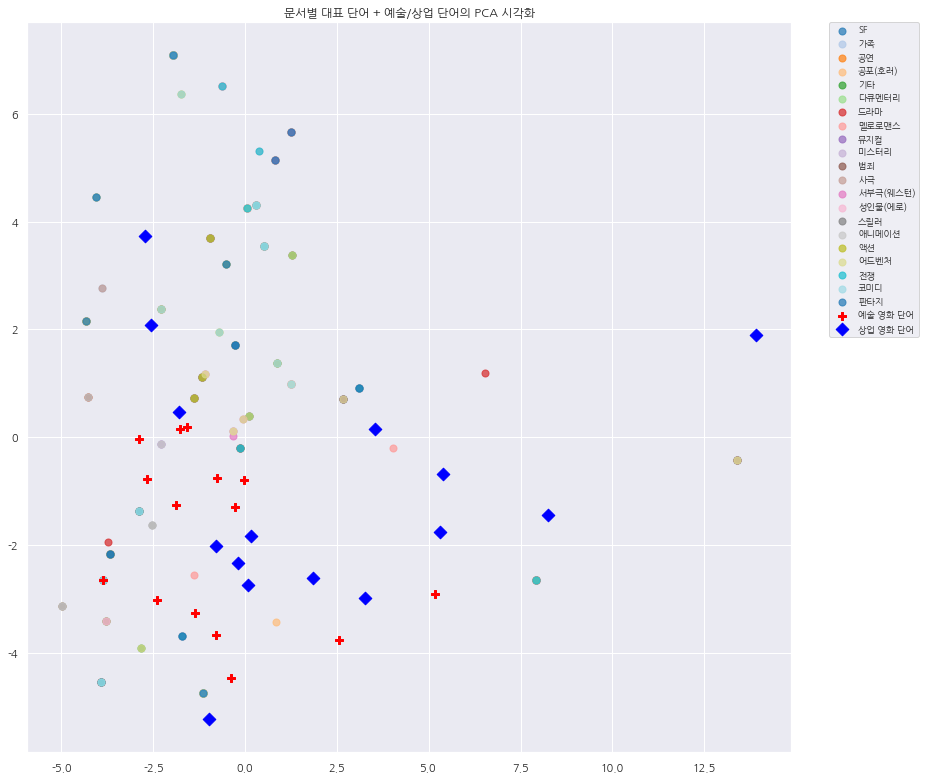

In [153]:
draw_pca(doc_keywords)

Î¨∏ÏÑúÎì§Ïù¥ Í≥µÌÜµÎêú ÌÜ†ÌîΩÏùÑ Í≥†Î•∏ Í≤ΩÏö∞ ÌÜ†ÌîΩÏùò ÏàúÏúÑÏóê Îî∞Îùº Í∞úÏàòÎ•º Îã§Î•¥Í≤å ÌïòÏó¨ Ï∞®Îì± Î∞∞Î∂ÑÌïòÏòÄÏúºÎÇò, Í∑∏ÎûòÎèÑ Ï§ëÎ≥µ Îã®Ïñ¥Í∞Ä ÍΩ§ ÎßéÏïÑ Í∑∏ÎûòÌîÑÍ∞Ä ÎπΩÎπΩÌïòÏßÄ ÏïäÎã§.

## ÌöåÍ≥†
- Ïñ¥Îñ§ Î∞©ÏãùÏúºÎ°ú ÎåÄÌëú Îã®Ïñ¥Î•º Ï∞æÏïÑÏïº Ìï† ÏßÄ Îß§Ïö∞ ÎßâÎßâÌïú ÌîÑÎ°úÏ†ùÌä∏ÏòÄÎã§.
- Îã®Ïñ¥Î•º Ï∞æÏùÄ Îí§ Ï§ëÎ≥µ Îã®Ïñ¥Î•º Ï†úÍ±∞ÌïòÎäî Í≥ºÏ†ïÏóêÏÑúÎèÑ Î∞òÎ≥µÏ†ÅÏúºÎ°ú Ï§ëÎ≥µ Îã®Ïñ¥Î•º Î™®Îëê Ï†úÍ∞ÄÌï† Ïãú ÏãúÍ∞ÑÏù¥ ÎÑàÎ¨¥ Ïò§Îûò Í±∏Î¶¨Í±∞ÎÇò Ï∂©Î∂ÑÌïú ÏñëÏùò Îã®Ïñ¥Î•º ÎΩëÏïÑÎÇ¥ÏßÄ Î™ªÌïòÍ≥†, Í≤∞Íµ≠ Ìï¥Îãπ Î¨∏ÏÑúÏôÄ Í¥ÄÎ†®Ïù¥ Ï†ÅÏùÄ Îã®Ïñ¥Îì§Î°ú ÎåÄÌëú Îã®Ïñ¥Í∞Ä Íµ¨ÏÑ±ÎêòÎäî Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌïòÏó¨ Ïñ¥Îäê Ï†ïÎèÑÍπåÏßÄ Ï§ëÎ≥µÏùÑ ÌóàÏö©Ìï† ÏßÄ ÎßéÏù¥ Í≥†ÎØºÌñàÎã§.
- Ïù¥ ÌîÑÎ°úÏ†ùÌä∏Î•º ÌÜµÌï¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê Îî∞Îùº Ïù∏Í∞ÑÏùò Ìé∏Ìñ•Ïù¥ Î™®Îç∏Ïóê ÌïôÏäµÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏóàÍ≥†, Ïù¥ÌõÑ Ïù∏Í≥µÏßÄÎä• ÌïôÏäµ Îã®Í≥ÑÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî Îç∞Ïù¥ÌÑ∞Ïùò Ìé∏Ìñ•ÏùÑ Í≥†Î†§Ìï¥ÏïºÍ≤†Îã§Í≥† ÏÉùÍ∞ÅÌïòÏòÄÎã§.